**COVID-19** Analysis

The **coronavirus pandemic** is an ongoing pandemic of coronavirus disease 2019 (COVID-19), caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2).The outbreak was first identified in Wuhan, Hubei, China, in December 2019, and was recognised as a pandemic by the World Health Organization (WHO) on 11 March 2020.As of 25 March, more than 438,000 cases of COVID-19 have been reported in more than 190 countries and territories, resulting in more than 19,600 deaths and more than 111,000 recoveries.
![https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic#/media/File:COVID-19_Outbreak_World_Map_per_Capita.svg](http://)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('../input/covid19-global-forecasting-week-1/train.csv')
test = pd.read_csv('../input/covid19-global-forecasting-week-1/test.csv')

In [3]:
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [4]:
test.tail()

,ForecastId,Province/State,Country/Region,Lat,Long,Date
12207,12208,NaN,Zambia,-15.4167,28.2833,2020-04-19
12208,12209,NaN,Zambia,-15.4167,28.2833,2020-04-20
12209,12210,NaN,Zambia,-15.4167,28.2833,2020-04-21
12210,12211,NaN,Zambia,-15.4167,28.2833,2020-04-22
12211,12212,NaN,Zambia,-15.4167,28.2833,2020-04-23


In [5]:
train.dtypes

Id                  int64
Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
ConfirmedCases    float64
Fatalities        float64
dtype: object

**Changing Date column to datetime**

In [6]:
train['Date']= pd.to_datetime(train['Date']) 
test['Date']= pd.to_datetime(test['Date']) 

**Set the index as date**

In [7]:
new_train = train.set_index(['Date'])
new_test = test.set_index(['Date'])

In [8]:
new_test.head()

,ForecastId,Province/State,Country/Region,Lat,Long
Date,,,,,
2020-03-12,1,NaN,Afghanistan,33.0,65.0
2020-03-13,2,NaN,Afghanistan,33.0,65.0
2020-03-14,3,NaN,Afghanistan,33.0,65.0
2020-03-15,4,NaN,Afghanistan,33.0,65.0
2020-03-16,5,NaN,Afghanistan,33.0,65.0


In [9]:
new_train.head()

,Id,Province/State,Country/Region,Lat,Long,ConfirmedCases,Fatalities
Date,,,,,,,
2020-01-22,1,NaN,Afghanistan,33.0,65.0,0.0,0.0
2020-01-23,2,NaN,Afghanistan,33.0,65.0,0.0,0.0
2020-01-24,3,NaN,Afghanistan,33.0,65.0,0.0,0.0
2020-01-25,4,NaN,Afghanistan,33.0,65.0,0.0,0.0
2020-01-26,5,NaN,Afghanistan,33.0,65.0,0.0,0.0


In [10]:
new_train.isnull().sum()

Id                   0
Province/State    9702
Country/Region       0
Lat                  0
Long                 0
ConfirmedCases       0
Fatalities           0
dtype: int64

In [11]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17892 entries, 2020-01-22 to 2020-03-24
Data columns (total 7 columns):
Id                17892 non-null int64
Province/State    8190 non-null object
Country/Region    17892 non-null object
Lat               17892 non-null float64
Long              17892 non-null float64
ConfirmedCases    17892 non-null float64
Fatalities        17892 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.1+ MB


*Dropping Id*

In [12]:
new_test = new_test.drop(["ForecastId"], axis=1)

In [13]:
new_train = new_train.drop(["Id"], axis=1)

**Filling missing values**

In [14]:
new_train[['Province/State']] = new_train[['Province/State']].fillna('')

In [15]:
new_train.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
ConfirmedCases    0
Fatalities        0
dtype: int64

In [16]:
new_test[['Province/State']] = new_test[['Province/State']].fillna('')

In [17]:
new_test.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
dtype: int64

In [18]:
import plotly.express as px

In [19]:
# Creating a dataframe with total no of cases for every country
confirmiedcases = pd.DataFrame(new_train.groupby('Country/Region')['ConfirmedCases'].sum())
confirmiedcases['Country/Region'] = confirmiedcases.index

In [20]:
confirmiedcases.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       ...
       'Turkey', 'US', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Zambia'],
      dtype='object', name='Country/Region', length=163)

In [21]:
confirmiedcases.index = np.arange(1,164)

In [22]:
global_confirmiedcases = confirmiedcases[['Country/Region','ConfirmedCases']]

In [23]:
fig = px.bar(global_confirmiedcases.sort_values('ConfirmedCases',ascending=False)[:20][::-1],
             x='ConfirmedCases',y='Country/Region',title='Confirmed Cases Worldwide',text='ConfirmedCases', height=900, orientation='h')
fig.show()

In [24]:
formated_gdf = new_train.groupby(['Date', 'Country/Region'])['ConfirmedCases'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['ConfirmedCases'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="ConfirmedCases", size='size', hover_name="Country/Region", 
                     range_color= [0, 1500], 
                     projection="natural earth", animation_frame="Date", 
                     title='CORONA: Spread Over Time From Jan 2020 to Mar 2020', color_continuous_scale="portland")
fig.show()

In [25]:
new_train.head()

,Province/State,Country/Region,Lat,Long,ConfirmedCases,Fatalities
Date,,,,,,
2020-01-22,,Afghanistan,33.0,65.0,0.0,0.0
2020-01-23,,Afghanistan,33.0,65.0,0.0,0.0
2020-01-24,,Afghanistan,33.0,65.0,0.0,0.0
2020-01-25,,Afghanistan,33.0,65.0,0.0,0.0
2020-01-26,,Afghanistan,33.0,65.0,0.0,0.0


In [26]:
new_test.head()

,Province/State,Country/Region,Lat,Long
Date,,,,
2020-03-12,,Afghanistan,33.0,65.0
2020-03-13,,Afghanistan,33.0,65.0
2020-03-14,,Afghanistan,33.0,65.0
2020-03-15,,Afghanistan,33.0,65.0
2020-03-16,,Afghanistan,33.0,65.0


In [27]:
new_train["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Finland', 'France', 'French Guiana', 'Gabon', 'Gambia, The',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guadeloupe',
       'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guyana', 'Holy See',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia

**Creating Time Features**

In [28]:
def create_time_features(df):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    return X

In [29]:
create_time_features(new_train)
create_time_features(new_test)

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,
2020-03-12,0,3,1,3,2020,72,12,11
2020-03-13,0,4,1,3,2020,73,13,11
2020-03-14,0,5,1,3,2020,74,14,11
2020-03-15,0,6,1,3,2020,75,15,11
2020-03-16,0,0,1,3,2020,76,16,12
...,...,...,...,...,...,...,...,...
2020-04-19,0,6,2,4,2020,110,19,16
2020-04-20,0,0,2,4,2020,111,20,17
2020-04-21,0,1,2,4,2020,112,21,17


In [30]:
new_train.head()

,Province/State,Country/Region,Lat,Long,ConfirmedCases,Fatalities,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,
2020-01-22,,Afghanistan,33.0,65.0,0.0,0.0,2020-01-22,0,2,1,1,2020,22,22,4
2020-01-23,,Afghanistan,33.0,65.0,0.0,0.0,2020-01-23,0,3,1,1,2020,23,23,4
2020-01-24,,Afghanistan,33.0,65.0,0.0,0.0,2020-01-24,0,4,1,1,2020,24,24,4
2020-01-25,,Afghanistan,33.0,65.0,0.0,0.0,2020-01-25,0,5,1,1,2020,25,25,4
2020-01-26,,Afghanistan,33.0,65.0,0.0,0.0,2020-01-26,0,6,1,1,2020,26,26,4


In [31]:
new_train.drop("date", axis=1, inplace=True)
new_test.drop("date", axis=1, inplace=True)

In [32]:
new_test.head()

,Province/State,Country/Region,Lat,Long,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,
2020-03-12,,Afghanistan,33.0,65.0,0,3,1,3,2020,72,12,11
2020-03-13,,Afghanistan,33.0,65.0,0,4,1,3,2020,73,13,11
2020-03-14,,Afghanistan,33.0,65.0,0,5,1,3,2020,74,14,11
2020-03-15,,Afghanistan,33.0,65.0,0,6,1,3,2020,75,15,11
2020-03-16,,Afghanistan,33.0,65.0,0,0,1,3,2020,76,16,12


**OHE of Province/State & Country/Region**

In [33]:
new_train = pd.concat([new_train,pd.get_dummies(new_train['Province/State'], prefix='ps')],axis=1)
new_train.drop(['Province/State'],axis=1, inplace=True)
new_test = pd.concat([new_test,pd.get_dummies(new_test['Province/State'], prefix='ps')],axis=1)
new_test.drop(['Province/State'],axis=1, inplace=True)

In [34]:
new_train = pd.concat([new_train,pd.get_dummies(new_train['Country/Region'], prefix='cr')],axis=1)
new_train.drop(['Country/Region'],axis=1, inplace=True)
new_test = pd.concat([new_test,pd.get_dummies(new_test['Country/Region'], prefix='cr')],axis=1)
new_test.drop(['Country/Region'],axis=1, inplace=True)

In [35]:
new_train.head()

,Lat,Long,ConfirmedCases,Fatalities,hour,dayofweek,quarter,month,year,dayofyear,...,cr_Turkey,cr_US,cr_Ukraine,cr_United Arab Emirates,cr_United Kingdom,cr_Uruguay,cr_Uzbekistan,cr_Venezuela,cr_Vietnam,cr_Zambia
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,33.0,65.0,0.0,0.0,0,2,1,1,2020,22,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,33.0,65.0,0.0,0.0,0,3,1,1,2020,23,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,33.0,65.0,0.0,0.0,0,4,1,1,2020,24,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,33.0,65.0,0.0,0.0,0,5,1,1,2020,25,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,33.0,65.0,0.0,0.0,0,6,1,1,2020,26,...,0,0,0,0,0,0,0,0,0,0


In [36]:
y_train = new_train["Fatalities"]

In [37]:
X_train = new_train.drop(["Fatalities", "ConfirmedCases"], axis=1)

**XGBoost**

In [38]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [39]:
reg = xgb.XGBRegressor(n_estimators=1000)

In [40]:
reg.fit(X_train, y_train, verbose=True)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

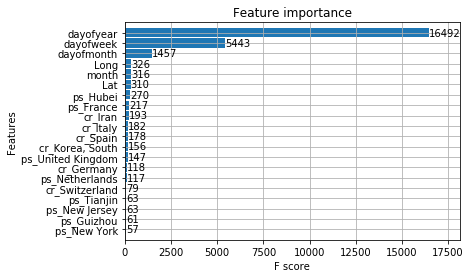

In [41]:
plot = plot_importance(reg, height=0.9, max_num_features=20)

In [42]:
y_train = train["ConfirmedCases"]

In [43]:
reg = xgb.XGBRegressor(n_estimators=1000)

In [44]:
reg.fit(X_train, y_train, verbose=True)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

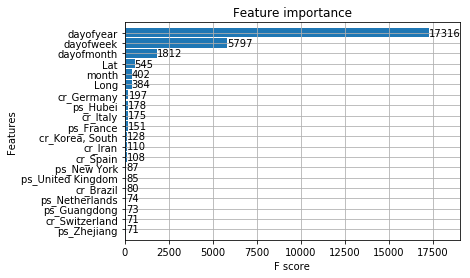

In [45]:
plot = plot_importance(reg, height=0.9, max_num_features=20)

In [46]:
y_train = train.groupby(["Country/Region"]).ConfirmedCases.pct_change(periods=1)

In [47]:
y_train = y_train.replace(np.nan, 0)

In [48]:
y_train = y_train.replace(np.inf, 0)

In [49]:
reg = xgb.XGBRegressor(n_estimators=1000)

In [50]:
reg.fit(X_train, y_train, verbose=True)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

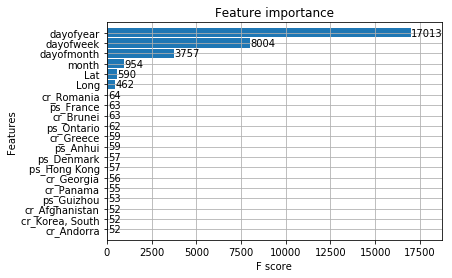

In [51]:
plot = plot_importance(reg, height=0.9, max_num_features=20)

In [52]:
y_train = train["ConfirmedCases"]
confirmed_reg = xgb.XGBRegressor(n_estimators=1000)
confirmed_reg.fit(X_train, y_train, verbose=True)
preds = confirmed_reg.predict(new_test)
preds = np.array(preds)
preds[preds < 0] = 0
preds = np.round(preds, 0)

In [53]:
preds = np.array(preds)

In [54]:
preds

array([7., 8., 9., ..., 4., 4., 8.], dtype=float32)

In [55]:
submission_new = pd.read_csv("../input/covid19-global-forecasting-week-1/submission.csv")

In [56]:
submission_new.head()

,ForecastId,ConfirmedCases,Fatalities
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,1


In [57]:
submission_new["ConfirmedCases"]=pd.Series(preds)

In [58]:
y_train = train["Fatalities"]
confirmed_reg = xgb.XGBRegressor(n_estimators=1000)
confirmed_reg.fit(X_train, y_train, verbose=True)
preds = confirmed_reg.predict(new_test)
preds = np.array(preds)
preds[preds < 0] = 0
preds = np.round(preds, 0)
submission_new["Fatalities"]=pd.Series(preds)

In [59]:
submission_new

,ForecastId,ConfirmedCases,Fatalities
0,1,7.0,0.0
1,2,8.0,0.0
2,3,9.0,0.0
3,4,15.0,0.0
4,5,21.0,0.0
...,...,...,...
12207,12208,9.0,0.0
12208,12209,5.0,0.0
12209,12210,4.0,0.0
12210,12211,4.0,0.0


In [60]:
submission_new.to_csv('submission.csv',index=False)